# Innovation and Pollution

The thrust for innovation has always been part of our human nature, but just lately we have begun to look at the toll that our modernization has taken on the earth.

The impact of the amount of pollution that we generate is a matter that just recently we have begun to analyze in order to avoid unrepairable damage to the environment.

In this project, we are going to analyze the relationship between the amount of innovation, the awareness of the market, and technological knowledge concerning the amount of pollution.


Link of the used dataset: https://www.kaggle.com/datasets/youneseloiarm/innovations-indices-and-pollution-index?resource=download


In [ ]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tabulate import tabulate
from pgmpy.factors.discrete import State
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling

# Import csv
file_path = './Innovation_and_Pollution_Data.csv'
pollution_data = pd.read_csv(file_path)

# Show complete dataset
pollution_data

,Country,Global_innovation_indices,Business_Sophistication,Creative_output,Humain_capital_and_Research,Infrastructures,Institutions,Knowledge_and_technology_outputs,Market_sophistication,Pollution
0,Sweden,63.1,68.1,52.9,64.1,62.6,88.8,60.3,64.6,18.44
1,Singapore,57.8,62.7,42.9,58.7,57.8,95.1,48.1,75.9,33.16
2,Switzerland,65.5,62.6,60.2,60.7,62.7,87.3,64.9,71.5,20.09
3,Netherlands,58.6,61.0,52.2,55.9,57.7,88.9,54.8,55.2,25.28
4,Finland,58.4,61.0,42.9,62.4,59.5,93.3,56.5,58.7,11.86
...,...,...,...,...,...,...,...,...,...,...
89,Cambodia,22.8,16.2,16.3,17.6,28.9,50.5,11.2,45.8,78.21
90,Bangladesh,20.2,15.4,9.6,10.1,32.0,45.5,13.7,40.9,84.91
91,Algeria,19.9,14.7,10.3,29.8,31.8,52.5,8.1,23.7,65.32
92,Ethiopia,18.6,14.5,8.7,10.5,24.6,48.4,16.2,26.1,77.74


---
# Values of the dataset:
 
- **Country** : Countries that were studied


- **Global_innovation_indices** : Global index of GII organization, So each country has a value between 1 and 100 according to the quality of innovation.


- **Business_Sophistication** : Quality of a country’s overall business networks as well as the quality of individual firms’ operations and strategies.


- **Creative_output** : Measure of your ability to churn out creations.


- **Humain_capital_and_Research** : Concept used by economists and social scientists to designate personal attributes considered useful in the production process. It encompasses employee knowledge, skills, know-how, good health, and education, and research is depending on the quality of R&D.


- **Infrastructures** : The system of public works of a country, state, or region also the resources (such as personnel, buildings, or equipment).


- **Institutions** : An established organization or corporation (such as a bank or university) especially of a public character financial institutions.


- **Knowledge_and_technology_outputs** : Technology refers to the state of knowledge concerning ways of converting resources into outputs and Knowledge is familiarity or awareness, of someone or something, such as facts (descriptive knowledge), skills (procedural knowledge), or objects (acquaintance knowledge) contributing to one's understanding. By most accounts, knowledge can be acquired in many different ways and from many sources, including but not limited to perception, reason, memory, testimony, scientific inquiry, education, and practice.


- **Market_sophistication** : The level of awareness (or sophistication) that the market has regarding the global environmental state.


- **Pollution** : Introduction of contaminants into the natural environment that cause adverse change. Pollution can take the form of any substance (solid, liquid, or gas) or energy (such as radioactivity, heat, sound, or light).

In [ ]:
# Total number of countries analyzed
total_countries = len(pollution_data)

# Some information about the data
pollution_data.info()

print("\n-------------------------------\n\nTotal number of countries:", total_countries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           94 non-null     object 
 1   Global_innovation_indices         94 non-null     float64
 2   Business_Sophistication           94 non-null     float64
 3   Creative_output                   94 non-null     float64
 4   Humain_capital_and_Research       94 non-null     float64
 5   Infrastructures                   94 non-null     float64
 6   Institutions                      94 non-null     float64
 7   Knowledge_and_technology_outputs  94 non-null     float64
 8   Market_sophistication             94 non-null     float64
 9   Pollution                         94 non-null     float64
dtypes: float64(9), object(1)
memory usage: 7.5+ KB

-------------------------------

Total number of countries: 94


The dataset, as we can see, it's a **simplified representation** of this real global phenomenon The goal, working with these restricted amounts of data, is to:

- Provide **general information** about this topic


- **Spread awareness**


- Research the **correlation** between these commonly used evaluations.

**Reasoning pattern**: Given **evidence →** Generate **analysis** and provide **explanation**

---
# Initial setup of the data

In order to create our Baysian network we will need to work with the probabilities of our desired information.

The network, which we are going to consider, analyze the relationship and the correlation between:

- **Knowledge and technology outputs**


- **Business sophistication**


- **Market sophistication**


- **Global innovation indices (GII)**


- **Pollution**

These five indicators were chosen because we believe that these encapsulate the most influential thrust in the innovation-pollution process.

### Data preprocessing

In order to simplify the dataset we performed some preprocessing in order to:

- **Drop columns** not relavant for our current research


- Apply **discretization** to the values of the dataset

In [ ]:
pl = pollution_data

# Drop columns not necessary for our network
pl = pl.drop(axis='columns', labels=['Country', 'Creative_output', 'Humain_capital_and_Research', 'Infrastructures', 'Institutions'])

# Create discretized table
# Labels 0 = low 1 = high
cut_labels = [0, 1]

# Range of the division 00-50 | 50-100
cut_bins = [0, 50, float('inf')]

# Cut and modify the needed columns
pl['Global_innovation_indices'] = pd.cut(pl['Global_innovation_indices'], bins=cut_bins, labels=cut_labels, include_lowest=True)
pl['Business_Sophistication'] = pd.cut(pl['Business_Sophistication'], bins=cut_bins, labels=cut_labels, include_lowest=True)
pl['Knowledge_and_technology_outputs'] = pd.cut(pl['Knowledge_and_technology_outputs'], bins=cut_bins, labels=cut_labels, include_lowest=True)
pl['Market_sophistication'] = pd.cut(pl['Market_sophistication'], bins=cut_bins, labels=cut_labels, include_lowest=True)
pl['Pollution'] = pd.cut(pl['Pollution'], bins=cut_bins, labels=cut_labels, include_lowest=True)

pl.head(12)

,Global_innovation_indices,Business_Sophistication,Knowledge_and_technology_outputs,Market_sophistication,Pollution
0,1,1,1,1,0
1,1,1,0,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0
5,1,1,1,1,1
6,0,1,0,0,0
7,1,1,0,1,0
8,1,1,0,1,0
9,1,1,1,1,0


As we can observe, the values were higly discretize, becoming only binary. This division represent:

- **0**: Low range of evaluation (between 00 - 50)


- **1**: High range of evaluation (between 50 - 100)

Even though all the values are said to be between 00 and 100, most of them only reach a maximum of 70 since these are evaluation values, and thus is generally difficult to reach the maximum evaluation possible. All the evaluated high range of values of each indicator were shown to be particularly different from eachother, making the division in bands (e.g. 00-20, 20-40, ...) ending up with some bands with 0 values for some indicators.

In addition to this, the low amount of data made a more refined division of the values not easy to implement and also not really worth in terms of information retrieval.

### Preview of the wanted network

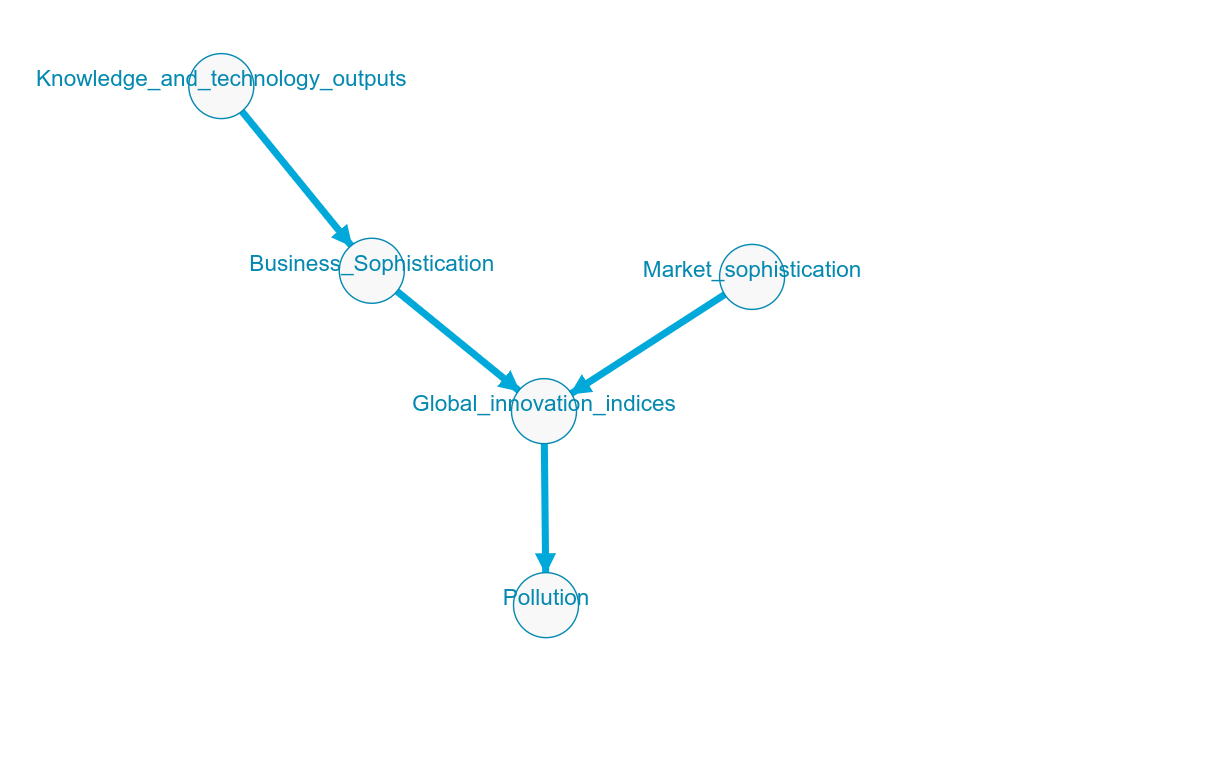

### Structure of the network

In this project, we will focus on the relation between the **amount of pollution generated by a country given its state of innovation**.

We are considering that the state of innovation is mainly influenced by the general business sophistication as well as the sophistication of the market.

Lastly, we want to put on the spot also the correlation between the sophistication of the businesses and the general amount of knowledge and skills present in the given country.

**Flow of influence**:

- Knowledge → Direct cause → Business sophistication


- Global innovation → Common effect → Business and Market sophistication


- Pollution → Direct effect → Global innovation

Also, it was chosen to calculate all the possible variables and structure of the network autonomously. Behind this project, there was a specific network layout in mind, with a specific causal relationship between the variables. Approaches like _Hill Climbing_ or _Tree Search_ were therefore tried, for completeness reasons, but discarded shortly after.

Here we can see the two example of the generated network which we didn't consider appropriated for the goal of this project.

Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

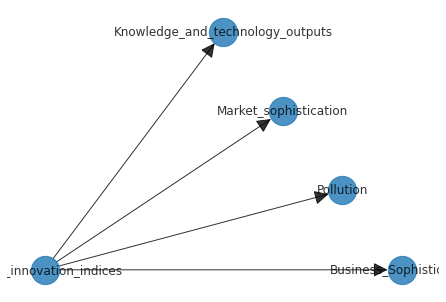

In [ ]:
# Test performed with Tree Search

from pgmpy.estimators import TreeSearch
import networkx as nx
import matplotlib.pyplot as plt

# Graph structure
tree = TreeSearch(pl)
dag = tree.estimate(estimator_type = "chow-liu")

# Show network
nx.draw_planar(
    dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.8
)
plt.show()
test_model = dag

  0%|          | 0/1000 [00:00<?, ?it/s]

[('Global_innovation_indices', 'Pollution'), ('Global_innovation_indices', 'Business_Sophistication'), ('Knowledge_and_technology_outputs', 'Business_Sophistication'), ('Knowledge_and_technology_outputs', 'Global_innovation_indices'), ('Market_sophistication', 'Business_Sophistication'), ('Market_sophistication', 'Global_innovation_indices')]


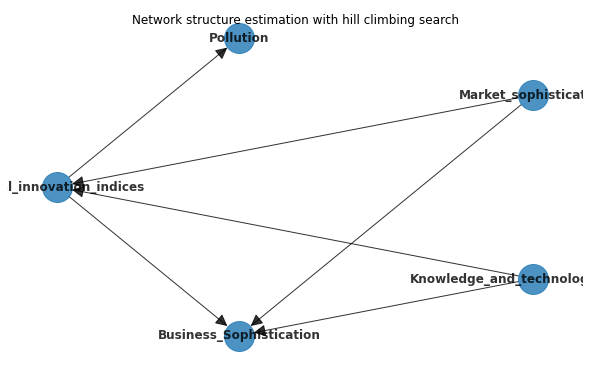

In [ ]:
from pgmpy.estimators import HillClimbSearch
hc = HillClimbSearch(pl)
black_list = []
# The market is not influenced by other variables
black_list += [(x, 'Market_sophistication') for x in pl.columns]
# Knowledge is not influenced by other variables
black_list += [(x, 'Knowledge_and_technology_outputs') for x in pl.columns] 
best_model_test = hc.estimate(scoring_method='k2score', epsilon=1e-10, max_iter=1000, black_list=black_list)
print(best_model_test.edges())

model_test = best_model_test

import networkx as nx
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
fig.suptitle('Network structure estimation with hill climbing search')
nx.draw_shell(
    model_test, with_labels=True, arrowsize=25, node_size=900, alpha=0.8, font_weight="bold", font_size=12
)
plt.show()

### Generating probabilities

The first probabilities which we are going to compute are the one regarding the knowledge and technological outputs and the market sophistication.

These two probabilities will form our base knowledge about the problem, creating the foundation on which the othe variabiles will be dependent on.

In [ ]:
# Declaration of the variables
precision = 3
range_max = 2
temp = []

In [ ]:
# Lists used to generate the Bayesian Network

# Countries divided by range of Knowledge_range
knowledge_range = []

# Countries divided by range of Market_sophistication
market_range = []

# Countries divided by range of Market_sophistication
business_range = []

# Countries divided by range of Global_innovation_indices
innovation_range = []

# Countries divided by range of Pollution
pollution_range = []

In [ ]:
# Iterate to divide by range both Knowledge_range and Market_sophistication
for threshold_i in range(range_max):
    
    # Range of countries by knowledge
    dk = pl[pl['Knowledge_and_technology_outputs'] == threshold_i]
    # Append the results
    knowledge_range.append([round(len(dk)/total_countries, precision)])
        
    # Range of countries by market
    dm = pl[pl['Market_sophistication'] == threshold_i]
    # Append the results
    market_range.append([round(len(dm)/total_countries, precision)])

Now all the remaining probabilities are going to be contidioned probabilities. To calculate them we will firstly reduce the datasets leaving only the entries where the given knowledge occur. On this reduced dataset we will evaluate the probability of our wanted information.

We will then generate the conditioned probability of business sophistication given the knowledge and technological output.

In [ ]:
# Iterate to calculate the conditioned probability P(business_range | knowledge_range)
for threshold_i in range(range_max):
    
    # Get the specific knowledge range
    df_knowledge = pl[pl['Knowledge_and_technology_outputs'] == threshold_i]
    
    # Iterate to find the business_range in the specific knowledge_range
    for threshold_j in range(range_max):
        df_business = df_knowledge[df_knowledge['Business_Sophistication'] == threshold_j]
        
        # Prevent division by 0
        if len(df_business) == 0:
            temp.append(.0)
        else:
            temp.append(round(len(df_business)/len(df_knowledge), precision))
            
    # Append and empty temp
    business_range.append(temp)
    temp = []


And perform the same with the conditioned probability of the global innovation indices.

In [ ]:
# Empty temp
temp = []

# Iterate to calculate the conditioned probability P(innovation_range | business_range, market_range)
for threshold_i in range(range_max):
    
    # Get the specific business range
    df_business = pl[pl['Business_Sophistication'] == threshold_i]
    
    # Iterate to find the market_range 
    for threshold_j in range(range_max):
        df_market = df_business[df_business['Market_sophistication'] == threshold_j]
        
        # Iterate to find the innovation_range in the specific business_range and market_range
        for threshold_k in range(range_max):
            df_innovation = df_market[df_market['Global_innovation_indices'] == threshold_k]
        
            # Prevent division by 0
            if len(df_innovation) == 0:
                temp.append(.0)
            else:
                temp.append(round(len(df_innovation)/len(df_market), precision))
            
        # Append and empty temp
        innovation_range.append(temp)
        temp = []

Lastly, the conditioned probability of Pollution given the just evaluated innovation probability.

In [ ]:
# Empty temp
temp = []

# Iterate to calculate the conditioned probability P(pollution_range | innovation_range)
for threshold_i in range(range_max):
    
    # Get the specific innovation range
    df_innovation = pl[pl['Global_innovation_indices'] == threshold_i]
    
    # Iterate to find the pollution_range in the specific innovation_range
    for threshold_j in range(range_max):
        df_pollution = df_innovation[df_innovation['Pollution'] == threshold_j]
        
        # Prevent division by 0
        if len(df_pollution) == 0:
            temp.append(.0)
        else:
            temp.append(round(len(df_pollution)/len(df_innovation), precision))
            
    # Append and empty temp
    pollution_range.append(temp)
    temp = []

### Tabular representation of the generated probabilities

In [ ]:
# Table representation of knowledge_range and market_range
table_km = [[' ', 'P(knowledge_range)', 'P(market_range)'],
         ['00 - 50', knowledge_range[0][0], market_range[0][0]],
         ['50 - 100', knowledge_range[1][0], market_range[1][0]]]

In [ ]:
# Table representation of business_range
table_b = [[' ', 'P(00-50)', 'P(50-100)']]
values = []
j = 0

# Iterate the values
for i in range(range_max):
    
    # Skip first empty list
    if j != 0:
        table_b.append(values)
        values = []
    
    # Format the range string
    rng = '%s - %s' % (i*50, i*50 + 50)
    values.append(rng)

    # Iterate the values found
    for k in range(len(business_range[j])):
        values.append(business_range[j][k])
        
    j += 1


table_b.append(values)

In [ ]:
# Table representation of innovation_range
table_i = [[' ', 'P(00-50)', 'P(50-100)']]
values = []
j = 0

for threshold_i in range(range_max):
    
    for threshold_j in range(range_max):
        # Format the range string
        rng = '%s - %s | %s - %s' % (threshold_i*50, threshold_i*50 +50, threshold_j*50, threshold_j*50 + 50)
        values.append(rng)
        
        for k in range(len(innovation_range[j])):
            values.append(innovation_range[j][k])
                            
        j += 1
        table_i.append(values)
        values = []

In [ ]:
# Table representation of pollution_range
table_p = [[' ', 'P(00-50)', 'P(50-100)']]
values = []
j = 0

# Iterate the values
for i in range(range_max):
    
    # Format the range string
    rng = '%s - %s' % (i*50, i*50 + 50)
    values.append(rng)

    # Iterate the values found
    for k in range(len(pollution_range[j])):
        values.append(pollution_range[j][k])
        
    j += 1
    table_p.append(values)
    values = []

In [ ]:
# Print of all the probabilities tables


print('\n\n\nP(knowledge_range),  P(market_range)\n')
print(tabulate(table_km, headers='firstrow', tablefmt='grid'))

print('\n\n\nP(business_range | knowledge_range)\n')
print(tabulate(table_b, headers='firstrow', tablefmt='grid'))

print('\n\n\nP(innovation_range | business_range, market_range)\n')
print(tabulate(table_i, headers='firstrow', tablefmt='grid'))

print('\n\n\nP(pollution_range | innovation_range)\n')
print(tabulate(table_p, headers='firstrow', tablefmt='grid'))




P(knowledge_range),  P(market_range)

+----------+----------------------+-------------------+
|          |   P(knowledge_range) |   P(market_range) |
+==========+======================+===================+
| 00 - 50  |                0.915 |             0.574 |
+----------+----------------------+-------------------+
| 50 - 100 |                0.085 |             0.426 |
+----------+----------------------+-------------------+



P(business_range | knowledge_range)

+----------+------------+-------------+
|          |   P(00-50) |   P(50-100) |
+==========+============+=============+
| 0 - 50   |      0.872 |       0.128 |
+----------+------------+-------------+
| 50 - 100 |      0.125 |       0.875 |
+----------+------------+-------------+



P(innovation_range | business_range, market_range)

+---------------------+------------+-------------+
|                     |   P(00-50) |   P(50-100) |
+=====================+============+=============+
| 0 - 50 | 0 - 50     |      1     |   

---

# Bayesian network

In [ ]:
# Transpose lists

business_range_T = list(map(list, zip(*business_range)))
innovation_range_T = list(map(list, zip(*innovation_range)))
pollution_range_T = list(map(list, zip(*pollution_range)))

In [ ]:
# Defining of the bayesian network structure
pollution_network = BayesianModel([('Knowledge', 'Business'), ('Business', 'Innovation'), ('Market', 'Innovation'), ('Innovation', 'Pollution')])

# Defining the CPDs
cpd_knowledge = TabularCPD('Knowledge', 2, knowledge_range)

cpd_market = TabularCPD('Market', 2, market_range)

cpd_business = TabularCPD('Business', 2, business_range_T, evidence = ['Knowledge'], evidence_card = [2])

cpd_innovation = TabularCPD('Innovation', 2, innovation_range_T, evidence = ['Business', 'Market'], evidence_card = [2,2])

cpd_pollution = TabularCPD('Pollution', 2, pollution_range_T, evidence = ['Innovation'], evidence_card = [2])

pollution_network.add_cpds(cpd_business,cpd_knowledge,cpd_market,cpd_innovation, cpd_pollution)


print('Model validity:', pollution_network.check_model())

Model validity: True


/home/stefano/.local/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


---
#  Exact Inference

Given the small dimension of the dataset, we can compute inference by variable elimination without having to worry about computational time.

In [ ]:
# Set the network to performe inference
pollution_inference = VariableElimination(pollution_network)

# The prior probability of Business
q_1 = pollution_inference.query(['Business'])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# The prior probability of Innovation
q_2 = pollution_inference.query(['Innovation'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# The prior probability of Pollution
q_3 = pollution_inference.query(['Pollution'])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Prints 
print('\n\nP(business)')
print(q_1)

print('\n\nP(innovation)')
print(q_2)

print('\n\nP(pollution)')
print(q_3)



P(business)
+-------------+-----------------+
| Business    |   phi(Business) |
+=============+=================+
| Business(0) |          0.8085 |
+-------------+-----------------+
| Business(1) |          0.1915 |
+-------------+-----------------+


P(innovation)
+---------------+-------------------+
| Innovation    |   phi(Innovation) |
+===============+===================+
| Innovation(0) |            0.8460 |
+---------------+-------------------+
| Innovation(1) |            0.1540 |
+---------------+-------------------+


P(pollution)
+--------------+------------------+
| Pollution    |   phi(Pollution) |
+==============+==================+
| Pollution(0) |           0.3288 |
+--------------+------------------+
| Pollution(1) |           0.6712 |
+--------------+------------------+


It is clear that the majority of the sampled nations, even the most "advanced" ones, do not largely surpass 50 as evaluation in all fields. This can be seen in these first probabilities, where the probability of being in the low range of business and innovation sophistication it's a significant **80%** and **84%**.

The "best" prior probability that we can notice refers to the pollution one, where the ratio low-high it's close to **30%-70%**.

In [ ]:
# Being in the high range of knowledge, how perform innovation
q_4 = pollution_inference.query(['Innovation'],{'Knowledge':1})
print('P(innovation | knowledge = high)')
print(q_4)

# Being in the lower range of knowledge, how perform innovation
q_5 = pollution_inference.query(['Innovation'],{'Knowledge':0})
print('P(innovation | knowledge = low)')
print(q_5)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

P(innovation | knowledge = high)
+---------------+-------------------+
| Innovation    |   phi(Innovation) |
+===============+===================+
| Innovation(0) |            0.4786 |
+---------------+-------------------+
| Innovation(1) |            0.5214 |
+---------------+-------------------+


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

P(innovation | knowledge = low)
+---------------+-------------------+
| Innovation    |   phi(Innovation) |
+===============+===================+
| Innovation(0) |            0.8801 |
+---------------+-------------------+
| Innovation(1) |            0.1199 |
+---------------+-------------------+


A clear and maybe unsurprising remark is the correlation between the global innovation index and the amount of knowledge of a nation.

The higher the knowledge is, the higher will be the probability of having a well innovative nation, almost **50%-50%**.

Instead, if the knowledge is on the low end of the spectrum, the chances of being a well innovative nation steeply drop down, arriving at a close **90%-10%** ratio.

In [ ]:
# Pollution knowing that we are in the lower range of business and market
q_6 = pollution_inference.query(['Pollution'],{'Business':0,'Market':0})
print('P(pollution | business = low, market = low)')
print(q_6)

# Pollution knowing that we are in the low range of market but high range of business
q_7 = pollution_inference.query(['Pollution'],{'Business':1,'Market':0})
print('P(pollution | business = high, market = low)')
print(q_7)

# Pollution knowing that we are in the high range of market but low range of business
q_8 = pollution_inference.query(['Pollution'],{'Business':0,'Market':1})
print('P(pollution | business = low, market = high)')
print(q_8)

# Pollution knowing that we are in the high range of market and business
q_9 = pollution_inference.query(['Pollution'],{'Business':1,'Market':1})
print('P(pollution | business = high, market = high)')
print(q_9)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

P(pollution | business = low, market = low)
+--------------+------------------+
| Pollution    |   phi(Pollution) |
+==============+==================+
| Pollution(0) |           0.2370 |
+--------------+------------------+
| Pollution(1) |           0.7630 |
+--------------+------------------+


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

P(pollution | business = high, market = low)
+--------------+------------------+
| Pollution    |   phi(Pollution) |
+==============+==================+
| Pollution(0) |           0.4355 |
+--------------+------------------+
| Pollution(1) |           0.5645 |
+--------------+------------------+


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

P(pollution | business = low, market = high)
+--------------+------------------+
| Pollution    |   phi(Pollution) |
+==============+==================+
| Pollution(0) |           0.3085 |
+--------------+------------------+
| Pollution(1) |           0.6915 |
+--------------+------------------+


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

P(pollution | business = high, market = high)
+--------------+------------------+
| Pollution    |   phi(Pollution) |
+==============+==================+
| Pollution(0) |           0.7931 |
+--------------+------------------+
| Pollution(1) |           0.2069 |
+--------------+------------------+


Even in this case two of the four results led to unsurprising results. 

Knowing that a nation has highly sophisticated businesses and market show a reduction in the amount of pollution, whereas, instead, a nation with low market and business sophistication show an increase in pollution emission.

The two more interesting results were the one analyzing only one characteristic at a time.

These two results show that it's more probable to have a lower amount of pollution if the businesses are the ones in the higher range of sophistication instead of the market. The trends of markets inevitably influence the direction of the industries, but it's a slow process that takes time. Businesses that autonomously take action in the direction of environmental-friendly improvement have a much more direct and imminent impact on pollution.

In [ ]:
# Business sophistication knowing that we are in the high range of pollution
q_10 = pollution_inference.query(['Business'],{'Pollution':0})
print('P(business | pollution = low)')
print(q_10)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

P(business | pollution = low)
+-------------+-----------------+
| Business    |   phi(Business) |
+=============+=================+
| Business(0) |          0.6577 |
+-------------+-----------------+
| Business(1) |          0.3423 |
+-------------+-----------------+


Another interesting result is that, if we assume to have a low range amount of pollution, this does not directly imply a general high sophistication of the businesses. 

We can notice instead that the low-high businesses ratio stays roughly at **65%-35%**, showing general backwardness in the level of businesses.

In [ ]:
# Innovationn knowing that we are in the low range of pollution
q_11 = pollution_inference.query(['Innovation'],{'Pollution':0})
print('P(Innovation | pollution = low)')
print(q_11)

# Innovationn knowing that we are in the High range of pollution
q_12 = pollution_inference.query(['Innovation'],{'Pollution':1})
print('P(Innovation | pollution = high)')
print(q_12)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

P(Innovation | pollution = low)
+---------------+-------------------+
| Innovation    |   phi(Innovation) |
+===============+===================+
| Innovation(0) |            0.6097 |
+---------------+-------------------+
| Innovation(1) |            0.3903 |
+---------------+-------------------+


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

P(Innovation | pollution = high)
+---------------+-------------------+
| Innovation    |   phi(Innovation) |
+===============+===================+
| Innovation(0) |            0.9617 |
+---------------+-------------------+
| Innovation(1) |            0.0383 |
+---------------+-------------------+


Lastly, the most concerning relation that we wanted to analyze was the one between innovation and pollution.

If we know that the amount of pollution is remarkable, it will be almost a compleate certainty that the given country will not have an higehr degree of innovation (A strong **96%**).

Instead, given a low amount of pollution, the general innovation status of the nation will increase, but not by a well defined margin. Generally, the probability of having an high innovation rating won't even reach the **40%**.

### Markov blanket

Quick display of the Markov blanket properties applied to Innovation and Pollution. This notion results particulary important in big networks since it gives a notion of important nodes with respect of the given one (other external nodes could be ignored since they wouldn't be used in the computation).

In [ ]:
pollution_network.get_markov_blanket('Innovation')

['Pollution', 'Business', 'Market']

In [ ]:
pollution_network.get_markov_blanket('Pollution')

['Innovation']

---
# Conclusions

Ultimately, even with a small-scale dataset like the one used in this project, the results do not differ that much from the globally already understood pollution situation.

We mainly discovered:

- **General backwardness** in all the inspected fields


- The **high impact of knowledge** (education) on the businesses' sophistication


- A lower amount of pollution is more likely to happen if the businesses are the ones more developed instead of the market (**slowness of the markets**)


- A low range of pollution **does not strongly imply** the probability of having a general high range of innovation